In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pandas
import pyspark.pandas as ps
import requests

In [ ]:
spark=SparkSession.builder.appName('Pyspark').getOrCreate()

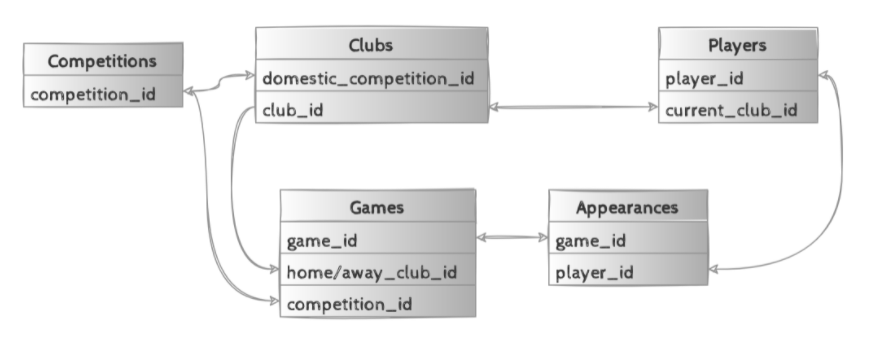

# DATASET PLAYERS MODIFICADO

In [ ]:
players = spark.read.load("/content/players.csv",format="csv", sep=",", header="true")
players = players.drop('url', 'name')
#players.createTempView("player")
players.printSchema()
players.show()


root
 |-- player_id: string (nullable = true)
 |-- current_club_id: string (nullable = true)
 |-- pretty_name: string (nullable = true)
 |-- country_of_birth: string (nullable = true)
 |-- country_of_citizenship: string (nullable = true)
 |-- date_of_birth: string (nullable = true)
 |-- position: string (nullable = true)
 |-- sub_position: string (nullable = true)
 |-- foot: string (nullable = true)
 |-- height_in_cm: string (nullable = true)
 |-- market_value_in_gbp: string (nullable = true)
 |-- highest_market_value_in_gbp: string (nullable = true)

+---------+---------------+--------------------+----------------+----------------------+-------------+----------+------------------+-----+------------+-------------------+---------------------------+
|player_id|current_club_id|         pretty_name|country_of_birth|country_of_citizenship|date_of_birth|  position|      sub_position| foot|height_in_cm|market_value_in_gbp|highest_market_value_in_gbp|
+---------+---------------+---------------

# DATASET APPEARANCES MODIFICADO

In [ ]:
appearances = spark.read.load("/content/appearances.csv",format="csv", sep=",", header="true")
appearances = appearances.withColumnRenamed("player_id","appearances_player_id") \
.withColumnRenamed("game_id","appearances_game_id")
appearances.printSchema()
appearances.show()

root
 |-- appearances_player_id: string (nullable = true)
 |-- appearances_game_id: string (nullable = true)
 |-- appearance_id: string (nullable = true)
 |-- competition_id: string (nullable = true)
 |-- player_club_id: string (nullable = true)
 |-- goals: string (nullable = true)
 |-- assists: string (nullable = true)
 |-- minutes_played: string (nullable = true)
 |-- yellow_cards: string (nullable = true)
 |-- red_cards: string (nullable = true)

+---------------------+-------------------+-------------+--------------+--------------+-----+-------+--------------+------------+---------+
|appearances_player_id|appearances_game_id|appearance_id|competition_id|player_club_id|goals|assists|minutes_played|yellow_cards|red_cards|
+---------------------+-------------------+-------------+--------------+--------------+-----+-------+--------------+------------+---------+
|                52453|            2483937|2483937_52453|           RU1|         28095|    0|      0|            90|          

# DATASET GAMES

In [ ]:
games = spark.read.load("/content/games.csv",format="csv", sep=",", header="true")
games = games.drop('url')
games.printSchema()
games.show()

root
 |-- game_id: string (nullable = true)
 |-- competition_code: string (nullable = true)
 |-- season: string (nullable = true)
 |-- round: string (nullable = true)
 |-- date: string (nullable = true)
 |-- home_club_id: string (nullable = true)
 |-- away_club_id: string (nullable = true)
 |-- home_club_goals: string (nullable = true)
 |-- away_club_goals: string (nullable = true)
 |-- home_club_position: string (nullable = true)
 |-- away_club_position: string (nullable = true)
 |-- stadium: string (nullable = true)
 |-- attendance: string (nullable = true)
 |-- referee: string (nullable = true)

+-------+----------------+------+-------------+----------+------------+------------+---------------+---------------+------------------+------------------+--------------------+----------+--------------------+
|game_id|competition_code|season|        round|      date|home_club_id|away_club_id|home_club_goals|away_club_goals|home_club_position|away_club_position|             stadium|attendance|

# JOIN PLAYERS CON APPEARANCES

In [ ]:
players_appearances = players.join(appearances,(players.player_id == appearances.appearances_player_id),"inner")
players_appearances.printSchema()
players_appearances.show()

root
 |-- player_id: string (nullable = true)
 |-- current_club_id: string (nullable = true)
 |-- pretty_name: string (nullable = true)
 |-- country_of_birth: string (nullable = true)
 |-- country_of_citizenship: string (nullable = true)
 |-- date_of_birth: string (nullable = true)
 |-- position: string (nullable = true)
 |-- sub_position: string (nullable = true)
 |-- foot: string (nullable = true)
 |-- height_in_cm: string (nullable = true)
 |-- market_value_in_gbp: string (nullable = true)
 |-- highest_market_value_in_gbp: string (nullable = true)
 |-- appearances_player_id: string (nullable = true)
 |-- appearances_game_id: string (nullable = true)
 |-- appearance_id: string (nullable = true)
 |-- competition_id: string (nullable = true)
 |-- player_club_id: string (nullable = true)
 |-- goals: string (nullable = true)
 |-- assists: string (nullable = true)
 |-- minutes_played: string (nullable = true)
 |-- yellow_cards: string (nullable = true)
 |-- red_cards: string (nullable = t

# JOIN GAMES, APPEARANCES Y PLAYERS

In [ ]:
players_appearances_games = players_appearances.join(games,players_appearances.appearances_game_id == games.game_id,"inner")
players_appearances_games.printSchema()
players_appearances_games.show()

root
 |-- player_id: string (nullable = true)
 |-- current_club_id: string (nullable = true)
 |-- pretty_name: string (nullable = true)
 |-- country_of_birth: string (nullable = true)
 |-- country_of_citizenship: string (nullable = true)
 |-- date_of_birth: string (nullable = true)
 |-- position: string (nullable = true)
 |-- sub_position: string (nullable = true)
 |-- foot: string (nullable = true)
 |-- height_in_cm: string (nullable = true)
 |-- market_value_in_gbp: string (nullable = true)
 |-- highest_market_value_in_gbp: string (nullable = true)
 |-- appearances_player_id: string (nullable = true)
 |-- appearances_game_id: string (nullable = true)
 |-- appearance_id: string (nullable = true)
 |-- competition_id: string (nullable = true)
 |-- player_club_id: string (nullable = true)
 |-- goals: string (nullable = true)
 |-- assists: string (nullable = true)
 |-- minutes_played: string (nullable = true)
 |-- yellow_cards: string (nullable = true)
 |-- red_cards: string (nullable = t

# EJEMPLO FILTRADO POR JUGADOR Y ORDENADO POR JUEGO CON MÁS ASISTENCIA

In [ ]:
players_appearances_games.filter(players_appearances_games.player_id == 67064).orderBy(desc('attendance')).show()

+---------+---------------+--------------------+----------------+----------------------+-------------+--------+--------------+-----+------------+-------------------+---------------------------+---------------------+-------------------+-------------+--------------+--------------+-----+-------+--------------+------------+---------+-------+----------------+------+------------+----------+------------+------------+---------------+---------------+------------------+------------------+--------------+----------+--------------------+
|player_id|current_club_id|         pretty_name|country_of_birth|country_of_citizenship|date_of_birth|position|  sub_position| foot|height_in_cm|market_value_in_gbp|highest_market_value_in_gbp|appearances_player_id|appearances_game_id|appearance_id|competition_id|player_club_id|goals|assists|minutes_played|yellow_cards|red_cards|game_id|competition_code|season|       round|      date|home_club_id|away_club_id|home_club_goals|away_club_goals|home_club_position|away_

# DATASET DE ESTADÍSTICAS

In [ ]:
points = spark.read.load("/content/points.csv",format="csv", sep=";", header="true", skipinitialspace=True)
points= points.drop(col("_c0"))
points= points.drop(col("Unnamed: 0"))
points.printSchema()
points.show()
points.count()

root
 |-- Player: string (nullable = true)
 |-- Market value: string (nullable = true)
 |-- Nation: string (nullable = true)
 |-- Pos: string (nullable = true)
 |-- Club_x: string (nullable = true)
 |-- Leauge: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- MP: string (nullable = true)
 |-- Starts: string (nullable = true)
 |-- Min: string (nullable = true)
 |-- Gls: string (nullable = true)
 |-- Ast: string (nullable = true)
 |-- PK_x: string (nullable = true)
 |-- PKatt_x: string (nullable = true)
 |-- CrdY: string (nullable = true)
 |-- CrdR: string (nullable = true)
 |-- Gls90: string (nullable = true)
 |-- Ast90: string (nullable = true)
 |-- G+A: string (nullable = true)
 |-- Gls+Ast: string (nullable = true)
 |-- PK: string (nullable = true)
 |-- PKatt: string (nullable = true)
 |-- Sh: string (nullable = true)
 |-- SoT: string (nullable = true)
 |-- FK: string (nullable = true)
 |-- SoT%: string (nullable = true)
 |-- Sh/90: string (nullable = true)
 |-- SoT/9

517

# JOIN PLAYES CON ESTADÍSTICAS 
Problema con nombres por tildes y mayúsculas. He intentado transformarlo a String con str(Object)  y luego lower() pero no me lo acepta. Habría que comprobar que muestra duplicados de nombres para saber si supone un problema

In [ ]:
players_points = players.join(points, players.pretty_name == points.Player,"inner")
players_points.show()

+---------+---------------+--------------------+----------------+----------------------+-------------+--------+------------------+-----+------------+-------------------+---------------------------+--------------------+------------+------+-----+---------------+--------------+----+----+------+----+----+----+----+-------+----+----+-----+-----+----+-------+----+-----+----+----+----+-----+-----+------+----+-----+------+-------+------+----+-----+------+-----+------+-----+-----+----+----+----------------+----------------+-----+-------+------+----+-----+----+
|player_id|current_club_id|         pretty_name|country_of_birth|country_of_citizenship|date_of_birth|position|      sub_position| foot|height_in_cm|market_value_in_gbp|highest_market_value_in_gbp|              Player|Market value|Nation|  Pos|         Club_x|        Leauge| Age|  MP|Starts| Min| Gls| Ast|PK_x|PKatt_x|CrdY|CrdR|Gls90|Ast90| G+A|Gls+Ast|  PK|PKatt|  Sh| SoT|  FK| SoT%|Sh/90|SoT/90|G/Sh|G/SoT|Tackle|TackleW|TakleD|Tkl%|Pres

# Ejemplo de Jugadores por País con Estadísticas

In [ ]:
players_points.filter(players_points.country_of_citizenship == 'Spain').show()
players_points.count()

+---------+---------------+---------------+----------------+----------------------+-------------+--------+------------------+-----+------------+-------------------+---------------------------+---------------+------------+------+-----+---------------+--------------+----+----+------+----+----+----+----+-------+----+----+-----+-----+----+-------+----+-----+----+----+----+-----+-----+------+----+-----+------+-------+------+----+-----+------+-----+------+-----+-----+----+----+----------------+----------------+-----+-------+------+----+-----+----+
|player_id|current_club_id|    pretty_name|country_of_birth|country_of_citizenship|date_of_birth|position|      sub_position| foot|height_in_cm|market_value_in_gbp|highest_market_value_in_gbp|         Player|Market value|Nation|  Pos|         Club_x|        Leauge| Age|  MP|Starts| Min| Gls| Ast|PK_x|PKatt_x|CrdY|CrdR|Gls90|Ast90| G+A|Gls+Ast|  PK|PKatt|  Sh| SoT|  FK| SoT%|Sh/90|SoT/90|G/Sh|G/SoT|Tackle|TackleW|TakleD|Tkl%|Press|Succ_x|    %|Block

403



---



CLUB INFO

In [ ]:
clubs = spark.read.load("/content/clubs.csv",format="csv", sep=",", header="true")
clubs = clubs.drop('url', 'name')
clubs.show()

+-------+--------------------+-----------------------+------------------+----------+-----------+-----------------+---------------------+---------------------+--------------------+-------------+-------------------+-------------------+
|club_id|         pretty_name|domestic_competition_id|total_market_value|squad_size|average_age|foreigners_number|foreigners_percentage|national_team_players|        stadium_name|stadium_seats|net_transfer_record|         coach_name|
+-------+--------------------+-----------------------+------------------+----------+-----------+-----------------+---------------------+---------------------+--------------------+-------------+-------------------+-------------------+
|   1429|           Cesena Fc|                    IT1|              5.09|        30|       24.0|                3|                 10.0|                    1|"Orogel Stadium "...|        23860|           +£180Th.|   Pierpaolo Bisoli|
|   5220|        Gs Ergotelis|                    GR1|          

DATAFRAME JOIN PLAYERS Y CLUBS

In [ ]:
players_clubs = players.join(clubs, players.current_club_id == clubs.club_id, "inner")
players_clubs.show()

+---------+---------------+--------------------+----------------+----------------------+-------------+----------+------------------+-----+------------+-------------------+---------------------------+-------+-------------------+-----------------------+------------------+----------+-----------+-----------------+---------------------+---------------------+--------------------+-------------+-------------------+--------------------+
|player_id|current_club_id|         pretty_name|country_of_birth|country_of_citizenship|date_of_birth|  position|      sub_position| foot|height_in_cm|market_value_in_gbp|highest_market_value_in_gbp|club_id|        pretty_name|domestic_competition_id|total_market_value|squad_size|average_age|foreigners_number|foreigners_percentage|national_team_players|        stadium_name|stadium_seats|net_transfer_record|          coach_name|
+---------+---------------+--------------------+----------------+----------------------+-------------+----------+------------------+----

In [ ]:
kpi1 = spark.sql("SELECT bbdd_players.player_id, bbdd_players.pretty_name AS Nombre, bbdd_players.position, bbdd_players.foot, highest_market_value_in_gbp FROM bbdd_players ORDER BY highest_market_value_in_gbp DESC")
kpi1.show()

+---------+--------------------+--------+-----+---------------------------+
|player_id|              Nombre|position| foot|highest_market_value_in_gbp|
+---------+--------------------+--------+-----+---------------------------+
|   342229|       Kylian Mbappe|  Attack|Right|                      1.8E8|
|    28003|        Lionel Messi|  Attack| Left|                     1.62E8|
|    68290|              Neymar|  Attack|Right|                     1.62E8|
|   134425|     Raheem Sterling|  Attack|Right|                     1.44E8|
|   148455|       Mohamed Salah|  Attack| Left|                     1.35E8|
|    88755|     Kevin De Bruyne|Midfield|Right|                     1.35E8|
|   125781|   Antoine Griezmann|  Attack| Left|                     1.35E8|
|   418560|      Erling Haaland|  Attack| Left|                     1.35E8|
|   200512|          Sadio Mane|  Attack|Right|                     1.35E8|
|   132098|          Harry Kane|  Attack|Right|                     1.35E8|
|    80444| 

In [ ]:
kpi2 = spark.sql("select * FROM bbdd_players INNER JOIN bbdd_points ON bbdd_players.pretty_name = bbdd_points.Player")
kpi2.show()

+---------+---------------+--------------------+--------------------+----------------+----------------------+-------------+--------+------------------+-----+------------+-------------------+---------------------------+--------------------+----------+--------------------+------------+------+-----+---------------+--------------+----+----+------+----+----+----+----+-------+----+----+-----+-----+----+-------+----+-----+----+----+----+-----+-----+------+----+-----+------+-------+------+----+-----+------+-----+------+-----+-----+----+----+----------------+----------------+-----+-------+------+----+-----+----+
|player_id|current_club_id|                name|         pretty_name|country_of_birth|country_of_citizenship|date_of_birth|position|      sub_position| foot|height_in_cm|market_value_in_gbp|highest_market_value_in_gbp|                 url|Unnamed: 0|              Player|Market value|Nation|  Pos|         Club_x|        Leauge| Age|  MP|Starts| Min| Gls| Ast|PK_x|PKatt_x|CrdY|CrdR|Gls90|